In [1]:
%matplotlib inline
%load_ext autoreload

%autoreload 2

In [2]:
import json
import gff3_parsing
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import glob
import statsmodels.stats.multitest as multi

# Stats/Visualization for single bacteria virus pair

In [4]:
host_id = 562
p_values = []
viral_means = []
sep = "\t"

host_df = pd.read_csv("../Data/host_genomes/{}.tsv".format(host_id), sep = sep)
host_mean = np.mean(host_df["energy_binding"])
print(host_df.shape)
for tsv_file in glob.glob("../Data/{}_rep_viruses/*tsv".format(host_id)):
    viral_df = pd.read_csv(tsv_file, sep = sep)
    
    rstat, p_value = stats.ranksums(host_df["energy_binding"], viral_df["energy_binding"])
    p_values.append(p_value)
    viral_means.append(np.mean(viral_df["energy_binding"]))

(4379, 13)


**Proportion of viruses that are significantly different than host**

In [5]:
significant_pvalues = []
for p in p_values:
    if p <= 0.01:
        significant_pvalues.append(p)
        
print(len(significant_pvalues), len(p_values), len(significant_pvalues)/len(p_values))


126 373 0.3378016085790885


**Visualizing p-values**

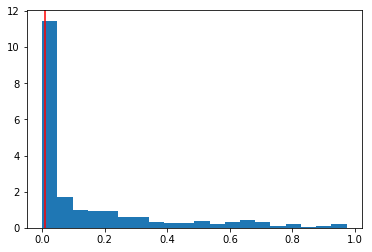

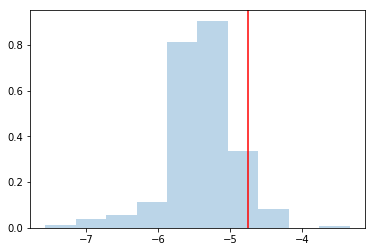

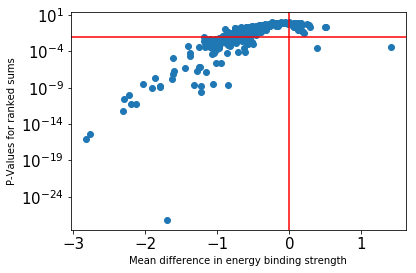

In [6]:
#2
fig, ax = plt.subplots()
ax.hist(p_values, 20, density = True)
ax.axvline(0.01, color = "r")


fig2, ax2 = plt.subplots()
ax2.hist(viral_means, density= True, alpha = 0.3)
ax2.axvline(host_mean, color = "r")

fig3, ax = plt.subplots()
ax.set_ylabel("P-Values for ranked sums")
ax.set_xlabel("Mean difference in energy binding strength")
ax.tick_params(labelsize = 15)
ax.semilogy(np.array(viral_means)-host_mean,p_values, marker = "o", linestyle = "")
ax.axvline(0, color = "r")
ax.axhline(.01, color = "r")

**Correcting for multiple hypotheses**

85 373 0.22788203753351208


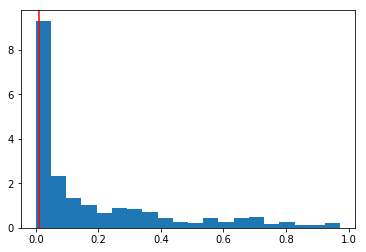

In [7]:
truth_array, corrected_p_values = multi.fdrcorrection(p_values)

fig, ax = plt.subplots()
ax.hist(corrected_p_values, 20, density = True)
ax.axvline(0.01, color = "r")


significant_pvalues = []
for p in corrected_p_values:
    if p <= 0.01:
        significant_pvalues.append(p)
        
print(len(significant_pvalues), len(corrected_p_values), len(significant_pvalues)/len(corrected_p_values))

In [8]:
stats.combine_pvalues(p_values)

(3624.7470661588354, 0.0)

# Stats/Visualization for all bacteria